In [93]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

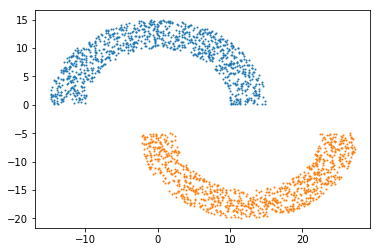

In [94]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [95]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

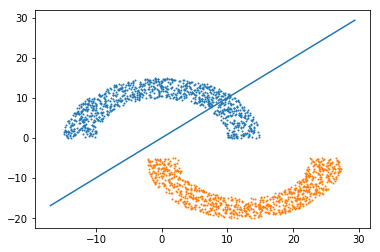

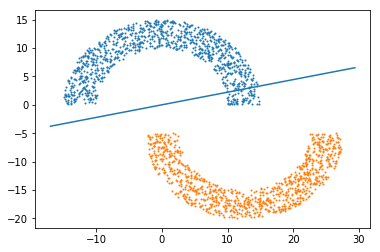

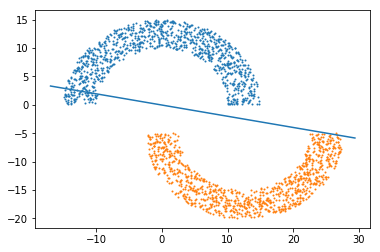

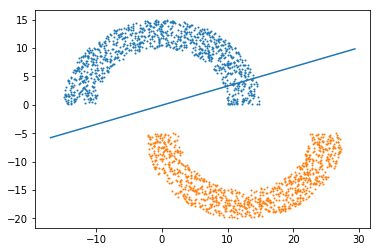

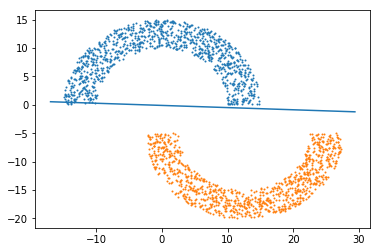

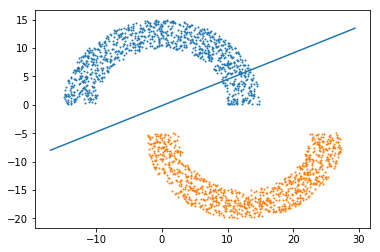

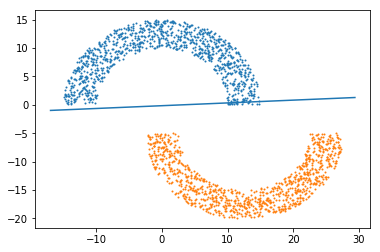

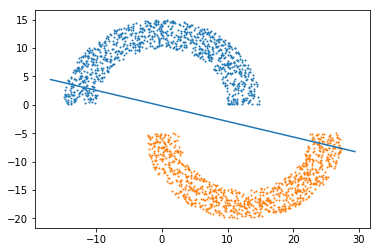

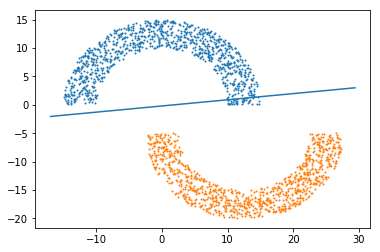

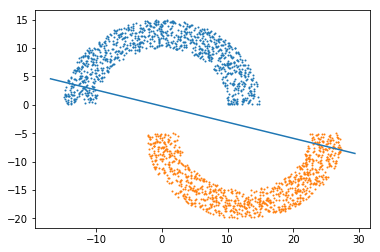

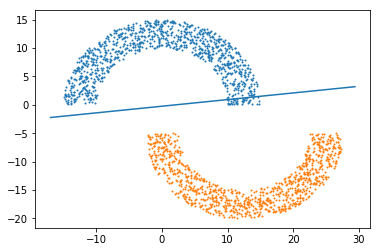

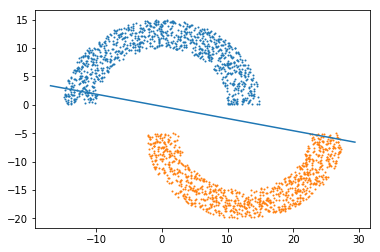

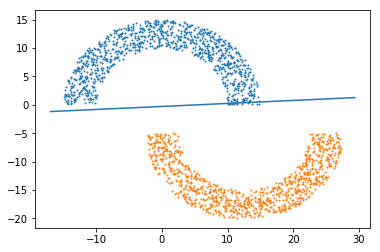

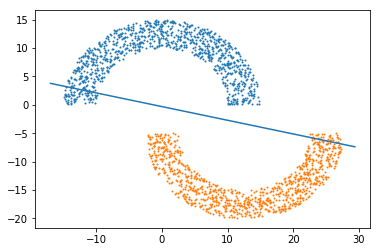

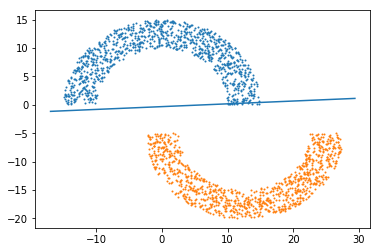

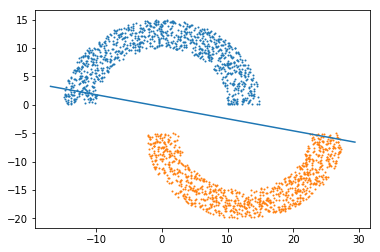

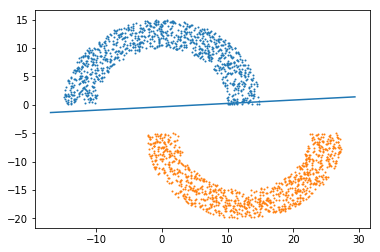

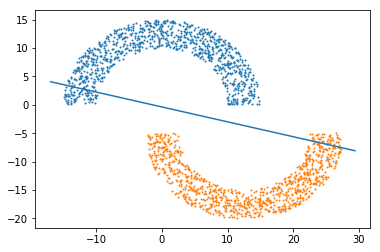

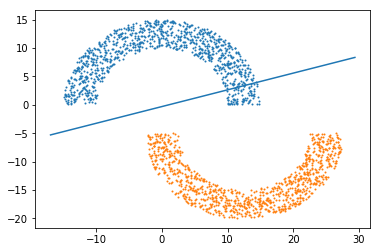

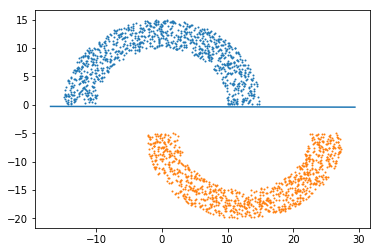

In [96]:
x_point = []
y_point = []
weight = [0,0,0]
count = 0
for i in range(len(data)):
        point = data[i]
        point.tolist()
        if(np.sign(np.matmul(point[0:3],weight)) != point[3]):
            weight = np.add(weight,(np.dot(point[3],point[0:3])))
            axes = plt.gca()
            plt.scatter(X1,Y1,s = 1)
            plt.scatter(X2,Y2,s = 1)
            x_h = np.array(axes.get_xlim())
            y_h = (-(weight[1]/weight[2])*x_h)-(weight[0]/weight[2])
            plt.plot(x_h,y_h)
            plt.show()

In [97]:
from sklearn import linear_model

In [98]:
r = linear_model.LinearRegression()

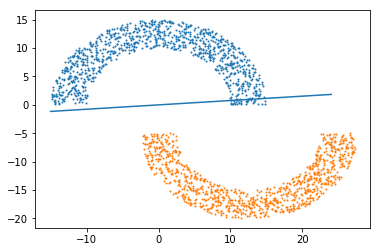

In [99]:
reg = r.fit(data[:, :3], data[:,-1])
_, b, m = reg.coef_

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
x_h = np.array(axes.get_xlim())
y_h = (-(weight[1]/weight[2])*x_h)-(weight[0]/weight[2])

x = np.arange(-15, 25)
plt.plot(x, m*x+b)

plt.show()